In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [78]:
df_image_fitzpatrick_new = pd.read_csv('datasets/fitzpatrick/fitzpatrick_with_recommendation.csv')
df_image_fitzpatrick_new.head()

,file,age,gender,race,phototype,hsv_mean_h,hsv_mean_s,hsv_mean_v,hsl_mean_h,hsl_mean_s,...,hsl_median_l,hsv_mode_h,hsv_mode_s,hsv_mode_v,hsl_mode_h,hsl_mode_s,hsl_mode_l,hsv_mean_v_percentage,product,Value
0,1.jpg,50-59,Male,East Asian,III,19.829241,137.944695,59.733877,19.805764,43.699139,...,94.0,8,125,60,13,42,85,0.234250,Tan (tan skin w/ neutral undertones),0.866667
1,10.jpg,30-39,Male,Middle Eastern,V,46.377611,66.848653,182.818818,46.495516,159.473434,...,74.0,2,63,208,2,184,77,0.716937,Tan (tan skin w/ neutral undertones),0.866667
2,100.jpg,20-29,Female,East Asian,III,18.022879,77.726981,227.602320,19.009347,193.497987,...,150.0,7,68,239,7,207,117,0.892558,Tan (tan skin w/ neutral undertones),0.866667
3,1000.jpg,30-39,Male,White,I & II,160.481166,85.828245,118.044105,160.467235,98.868762,...,56.0,174,90,94,174,76,55,0.462918,Tan (tan skin w/ neutral undertones),0.866667
4,10004.jpg,40-49,Male,Indian,V,12.648039,101.791016,141.452208,12.642140,113.252232,...,67.0,12,102,136,12,100,65,0.554715,Tan (tan skin w/ neutral undertones),0.866667


In [79]:
df_image_fitzpatrick_new.get("phototype").unique()

array(['III', 'V', 'I & II', 'IV', 'VI'], dtype=object)

In [80]:
df_image_fitzpatrick_new.get("phototype").value_counts()

phototype
IV        7989
III       7988
V         7988
I & II    7988
VI        7986
Name: count, dtype: int64

In [82]:
le_fitzpatrick = LabelEncoder()
df_image_fitzpatrick_new['phototype'] = le_fitzpatrick.fit_transform(df_image_fitzpatrick_new['phototype'])

In [83]:
df_image_fitzpatrick_new

,file,age,gender,race,phototype,hsv_mean_h,hsv_mean_s,hsv_mean_v,hsl_mean_h,hsl_mean_s,...,hsl_median_l,hsv_mode_h,hsv_mode_s,hsv_mode_v,hsl_mode_h,hsl_mode_s,hsl_mode_l,hsv_mean_v_percentage,product,Value
0,1.jpg,50-59,Male,East Asian,1,19.829241,137.944695,59.733877,19.805764,43.699139,...,94.0,8,125,60,13,42,85,0.234250,Tan (tan skin w/ neutral undertones),0.866667
1,10.jpg,30-39,Male,Middle Eastern,3,46.377611,66.848653,182.818818,46.495516,159.473434,...,74.0,2,63,208,2,184,77,0.716937,Tan (tan skin w/ neutral undertones),0.866667
2,100.jpg,20-29,Female,East Asian,1,18.022879,77.726981,227.602320,19.009347,193.497987,...,150.0,7,68,239,7,207,117,0.892558,Tan (tan skin w/ neutral undertones),0.866667
3,1000.jpg,30-39,Male,White,0,160.481166,85.828245,118.044105,160.467235,98.868762,...,56.0,174,90,94,174,76,55,0.462918,Tan (tan skin w/ neutral undertones),0.866667
4,10004.jpg,40-49,Male,Indian,3,12.648039,101.791016,141.452208,12.642140,113.252232,...,67.0,12,102,136,12,100,65,0.554715,Tan (tan skin w/ neutral undertones),0.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39934,9476.jpg,30-39,Female,Black,4,13.470643,147.794364,128.370994,13.464066,91.496672,...,110.0,6,169,123,6,84,128,0.503416,Tan (tan skin w/ neutral undertones),0.866667
39935,9501.jpg,40-49,Female,Black,4,20.292730,108.283861,131.563835,20.354831,105.746193,...,68.0,7,102,156,7,122,63,0.515937,Tan (tan skin w/ neutral undertones),0.866667
39936,9560.jpg,30-39,Female,Black,4,6.820392,188.809431,53.937221,6.838867,34.513811,...,148.0,6,170,54,6,34,153,0.211519,Tan (tan skin w/ neutral undertones),0.866667
39937,9561.jpg,20-29,Female,Black,4,9.870436,177.025849,97.407346,9.860112,64.856744,...,134.0,10,165,102,10,70,122,0.381990,Tan (tan skin w/ neutral undertones),0.866667


In [84]:
df_image_fitzpatrick_new.describe().T

,count,mean,std,min,25%,50%,75%,max
phototype,39939.0,1.999900,1.414178,0.000000,1.000000,2.000000,3.000000,4.000000
hsv_mean_h,39939.0,21.908837,31.762843,0.000000,8.202896,10.427894,15.768475,177.083386
hsv_mean_s,39939.0,119.238722,37.784254,0.000000,93.544234,117.541394,142.832619,253.101802
hsv_mean_v,39939.0,150.826723,44.887873,14.946189,118.809401,151.868882,183.839336,253.330895
hsl_mean_h,39939.0,22.185352,32.068666,0.000000,8.241400,10.476722,16.027683,177.081294
hsl_mean_s,39939.0,117.379729,39.176495,9.234594,88.946439,116.016362,144.438506,250.905174
hsl_mean_l,39939.0,106.307094,41.299418,0.000000,77.723364,100.550403,128.925891,252.303013
hsv_median_h,39939.0,18.082163,37.829441,0.000000,6.000000,8.000000,11.000000,179.000000
hsv_median_s,39939.0,118.880856,39.200980,0.000000,92.000000,117.000000,143.000000,255.000000
hsv_median_v,39939.0,154.128947,48.348967,13.000000,119.000000,155.000000,190.000000,255.000000


In [85]:
df_image_fitzpatrick_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39939 entries, 0 to 39938
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   file                   39939 non-null  object 
 1   age                    39939 non-null  object 
 2   gender                 39939 non-null  object 
 3   race                   39939 non-null  object 
 4   phototype              39939 non-null  int64  
 5   hsv_mean_h             39939 non-null  float64
 6   hsv_mean_s             39939 non-null  float64
 7   hsv_mean_v             39939 non-null  float64
 8   hsl_mean_h             39939 non-null  float64
 9   hsl_mean_s             39939 non-null  float64
 10  hsl_mean_l             39939 non-null  float64
 11  hsv_median_h           39939 non-null  float64
 12  hsv_median_s           39939 non-null  float64
 13  hsv_median_v           39939 non-null  float64
 14  hsl_median_h           39939 non-null  float64
 15  hs

In [86]:
df_image_fitzpatrick_new["phototype"].value_counts()

phototype
2    7989
1    7988
3    7988
0    7988
4    7986
Name: count, dtype: int64


# K-Nearest Neighbors Fitzpatrick Skin Type

In [87]:
features_fitzpatrick = [
    "hsv_mean_h",
    "hsv_mean_s",
    "hsv_mean_v",
]
selected_fitzpatrick = df_image_fitzpatrick_new[features_fitzpatrick]

<Axes: >

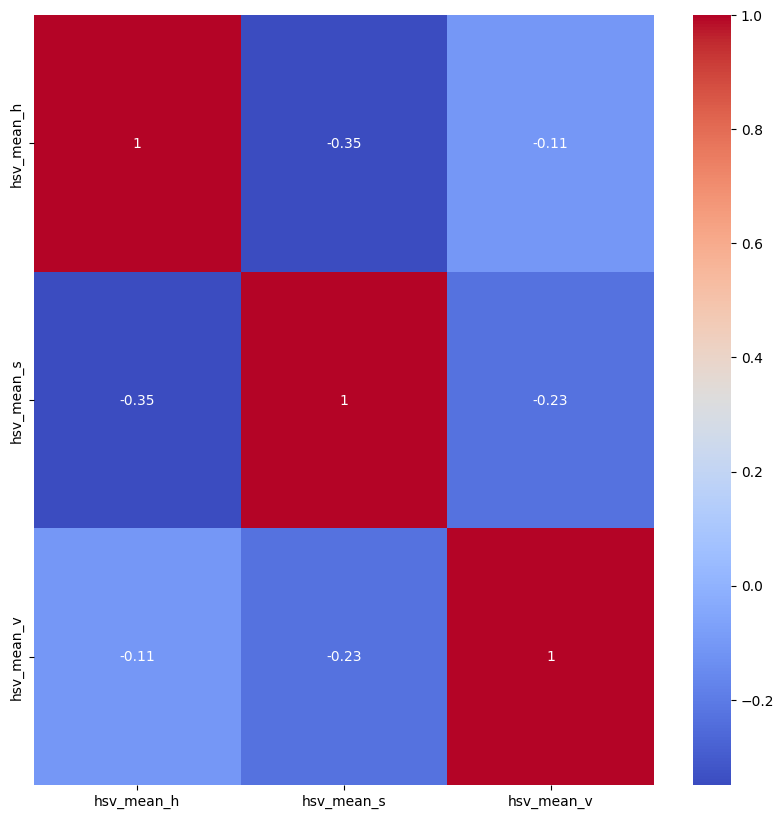

In [88]:
plt.figure(figsize=(10, 10))
sns.heatmap(selected_fitzpatrick.corr(), annot=True, cmap="coolwarm")

In [89]:
sc_fitzpatrick = StandardScaler()
sc_fitzpatrick.fit(selected_fitzpatrick)
X_fitzpatrick = pd.DataFrame(sc_fitzpatrick.transform(selected_fitzpatrick), columns=features_fitzpatrick)
X_fitzpatrick

,hsv_mean_h,hsv_mean_s,hsv_mean_v
0,-0.065473,0.495079,-2.029367
1,0.770368,-1.386576,0.712720
2,-0.122344,-1.098666,1.710408
3,4.362773,-0.884254,-0.730332
4,-0.291564,-0.461778,-0.208846
...,...,...,...
39934,-0.265666,0.755765,-0.500269
39935,-0.050881,-0.289936,-0.429139
39936,-0.475040,1.841285,-2.158505
39937,-0.379014,1.529416,-1.190077


In [90]:
y_fitzpatrick_phototype = df_image_fitzpatrick_new["phototype"]

In [91]:
y_fitzpatrick_phototype

0        1
1        3
2        1
3        0
4        3
        ..
39934    4
39935    4
39936    4
39937    4
39938    4
Name: phototype, Length: 39939, dtype: int64

In [92]:
X_train_fitzpatrick_phototype, X_test_fitzpatrick_phototype, y_train_fitzpatrick_phototype, y_test_fitzpatrick_phototype = train_test_split(X_fitzpatrick, y_fitzpatrick_phototype, test_size=0.3, random_state=42)

In [101]:
train_scores_fitzpatrick_phototype = np.array([])
test_scores_fitzpatrick_phototype = np.array([])

for i in range(1, 26):
    knn_phototype = KNeighborsClassifier(n_neighbors=i)
    knn_phototype.fit(X_train_fitzpatrick_phototype, y_train_fitzpatrick_phototype)

    train_scores_fitzpatrick_phototype = np.append(train_scores_fitzpatrick_phototype, knn_phototype.score(X_train_fitzpatrick_phototype, y_train_fitzpatrick_phototype))
    test_scores_fitzpatrick_phototype = np.append(test_scores_fitzpatrick_phototype, knn_phototype.score(X_test_fitzpatrick_phototype, y_test_fitzpatrick_phototype))

In [102]:
max_train_score_fitzpatrick_phototype = np.max(train_scores_fitzpatrick_phototype)
train_scores_ind_fitzpatrick_phototype = np.where(train_scores_fitzpatrick_phototype == max_train_score_fitzpatrick_phototype)[0][0]
print(f"Max train score on Phototype Features {max_train_score_fitzpatrick_phototype*100:.2f}% at k = {train_scores_ind_fitzpatrick_phototype+1}")

Max train score on Phototype Features 99.99% at k = 1


In [103]:
print("All train scores on Photoype Features:")
for i, score in enumerate(train_scores_fitzpatrick_phototype):
    print(f"K = {i+1} :: {score*100:.2f}%")

All train scores on Photoype Features:
K = 1 :: 99.99%
K = 2 :: 62.17%
K = 3 :: 54.84%
K = 4 :: 51.38%
K = 5 :: 48.58%
K = 6 :: 46.41%
K = 7 :: 44.71%
K = 8 :: 43.60%
K = 9 :: 42.87%
K = 10 :: 41.62%
K = 11 :: 41.01%
K = 12 :: 40.55%
K = 13 :: 39.93%
K = 14 :: 39.55%
K = 15 :: 39.29%
K = 16 :: 39.18%
K = 17 :: 39.04%
K = 18 :: 38.78%
K = 19 :: 38.19%
K = 20 :: 38.08%
K = 21 :: 37.51%
K = 22 :: 37.51%
K = 23 :: 37.37%
K = 24 :: 37.22%
K = 25 :: 37.14%


In [104]:
max_test_score_fitzpatrick_phototype = np.max(test_scores_fitzpatrick_phototype)
test_scores_ind_fitzpatrick_phototype = np.where(test_scores_fitzpatrick_phototype == max_test_score_fitzpatrick_phototype)[0][0]
print(f"Max test score on Phototype Features {max_test_score_fitzpatrick_phototype*100:.2f}% at k = {test_scores_ind_fitzpatrick_phototype+1}")

Max test score on Phototype Features 28.67% at k = 24


In [105]:
print("All test scores on Photoype Features:")
for i, score in enumerate(test_scores_fitzpatrick_phototype):
    print(f"K = {i+1} :: {score*100:.2f}%")

All test scores on Photoype Features:
K = 1 :: 24.18%
K = 2 :: 23.84%
K = 3 :: 24.77%
K = 4 :: 25.32%
K = 5 :: 25.31%
K = 6 :: 25.68%
K = 7 :: 26.12%
K = 8 :: 26.16%
K = 9 :: 26.64%
K = 10 :: 26.82%
K = 11 :: 27.29%
K = 12 :: 27.77%
K = 13 :: 27.48%
K = 14 :: 27.67%
K = 15 :: 27.85%
K = 16 :: 27.73%
K = 17 :: 28.03%
K = 18 :: 28.20%
K = 19 :: 28.38%
K = 20 :: 28.39%
K = 21 :: 28.48%
K = 22 :: 28.58%
K = 23 :: 28.39%
K = 24 :: 28.67%
K = 25 :: 28.42%


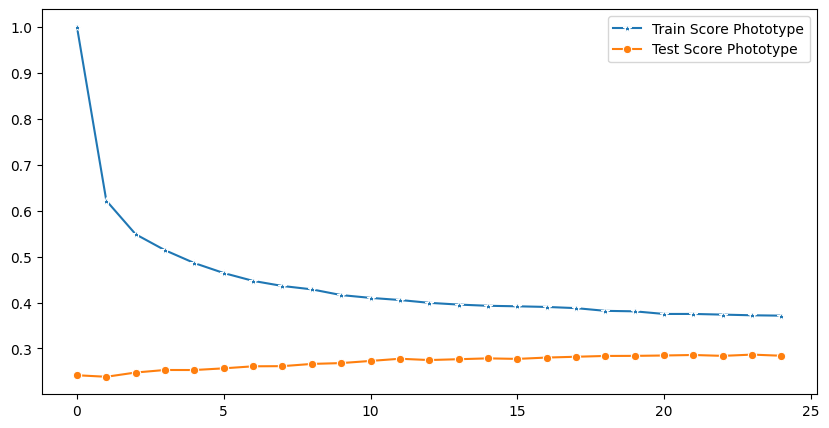

In [106]:
plt.figure(figsize=(10, 5))
line_fitzpatrick_phototype = sns.lineplot(train_scores_fitzpatrick_phototype, marker="*", label="Train Score Phototype")
line_fitzpatrick_phototype = sns.lineplot(test_scores_fitzpatrick_phototype, marker="o", label="Test Score Phototype")

In [107]:
knn_fitzpatrick_phototype = KNeighborsClassifier(n_neighbors=3)
knn_fitzpatrick_phototype = knn_fitzpatrick_phototype.fit(X_train_fitzpatrick_phototype, y_train_fitzpatrick_phototype)
knn_fitzpatrick_phototype.score(X_test_fitzpatrick_phototype, y_test_fitzpatrick_phototype)

0.24770489066933735

In [108]:
# Define the train_sizes and scoring metric
train_sizes, train_scores, test_scores = learning_curve(
    knn_fitzpatrick_phototype,
    X_train_fitzpatrick_phototype,
    y_train_fitzpatrick_phototype,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    scoring="accuracy",
)

# Calculate mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color="blue", marker="o", label="Training score")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue"
)
plt.plot(train_sizes, test_mean, color="orange", marker="s", label="Test score")
plt.fill_between(
    train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange"
)

# Set labels and title
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for KNN-Phototype Classifier")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred_fitzpatrick_phototype = knn_fitzpatrick_phototype.predict(X_test_fitzpatrick_phototype)
print(classification_report(y_test_fitzpatrick_phototype, y_pred_fitzpatrick_phototype))

              precision    recall  f1-score   support

           0       0.25      0.42      0.31       301
           1       0.31      0.31      0.31       268
           2       0.19      0.14      0.16       218
           3       0.34      0.28      0.31       395
           4       0.31      0.11      0.17       141

    accuracy                           0.28      1323
   macro avg       0.28      0.25      0.25      1323
weighted avg       0.28      0.28      0.27      1323



In [ ]:
unseen_data_phototype = np.array([21.377610809948976,25.84865274234694,25.8188177614796])
test_unseen_phototype = knn_fitzpatrick_phototype.predict(unseen_data_phototype.reshape(1, -1))
print(f"Predicted Phototype: {le_fitzpatrick.inverse_transform(test_unseen_phototype)[0]}")

Predicted Phototype: I & II


/Users/avv210/Documents/IT/GitHub/fores/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
knn_cv_fitzpatrick_phototype = KNeighborsClassifier(n_neighbors=3)
cv_scores_fitzpatrick_phototype = cross_val_score(knn_cv_fitzpatrick_phototype, X_fitzpatrick, y_fitzpatrick_phototype, cv=25)
print("Cross Validation Score on Phototype")
print(cv_scores_fitzpatrick_phototype)

Cross Validation Score on Phototype
[0.20903955 0.25423729 0.26553672 0.28813559 0.23163842 0.31073446
 0.23728814 0.27683616 0.28409091 0.25568182 0.26704545 0.3125
 0.27272727 0.35227273 0.26704545 0.26136364 0.32954545 0.3125
 0.3125     0.35227273 0.35227273 0.28977273 0.23295455 0.20454545
 0.25568182]


In [ ]:
y_pred_fitzpatrick_phototype = knn_fitzpatrick_phototype.predict(X_test_fitzpatrick_phototype)
confusion_matrix(y_test_fitzpatrick_phototype, y_pred_fitzpatrick_phototype)
pd.crosstab(y_test_fitzpatrick_phototype, y_pred_fitzpatrick_phototype, rownames=["True"], colnames=["Predicted"], margins=True)

Predicted,0,1,2,3,4,All
True,,,,,,
0,125,51,40,77,8,301
1,94,83,37,49,5,268
2,89,40,30,55,4,218
3,162,62,42,111,18,395
4,40,33,13,39,16,141
All,510,269,162,331,51,1323


In [ ]:
rskf_fitzpatrick_phototype = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

In [ ]:
param_grid_fitzpatrick_phototype = {"n_neighbors": np.arange(1, 26)}
knn_fitzpatrick_phototype = KNeighborsClassifier()
knn_gridcv_fitzpatrick_phototype = GridSearchCV(knn_fitzpatrick_phototype, param_grid_fitzpatrick_phototype, cv=rskf_fitzpatrick_phototype)
knn_gridcv_fitzpatrick_phototype.fit(X_fitzpatrick, y_fitzpatrick_phototype)

print(f"Best score Phototype Features: {knn_gridcv_fitzpatrick_phototype.best_score_}")
print(f"Best parameters Phototype Features: {knn_gridcv_fitzpatrick_phototype.best_params_}")

Best score Phototype Features: 0.3610682048074621
Best parameters Phototype Features: {'n_neighbors': 25}


#### Save the Model to Pickle

In [100]:
pd.to_pickle(knn_fitzpatrick_phototype, "models/knn-phototype.pkl")